### Projeto final de Ciência dos Dados: Classificação de Pokémons a partir da sua cor e... 

##### Feito por:
Enrico Aloisi Nardi e Evandro Fontana Romeiro- 2º semestre de engenharia (Insper 2018)


##### Ideia geral do projeto:
A partir do que será apresentado, buscaremos tentar encontrar uma relação explícita entre os stats de um Pokémon, a sua cor e a sua categoria para então prever se existe um agrupamento natural deles mesmo que pertençam a diferentes gerações.

In [94]:
# Imports necessários para o projeto:
import os
import colorsys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from colorthief import ColorThief
from mpl_toolkits.mplot3d import Axes3D
from pandas import DataFrame as df
from sklearn import cluster
from pandas import ExcelWriter
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
import seaborn as sns
%matplotlib inline

In [2]:
data= pd.read_csv('Pokemon.csv') #lendo o database baixado do kaggle 

#O bloco a seguir encontra-se comentado para que o comando criador.save() não interfira nas alterações feitas no excel pelo computador
#transformando o database csv em excel para poder eliminar incongruências entre a base de fotos e a de dados sobre os 
#Pokémons
# criador = ExcelWriter('Pokexcel.xlsx')                         
# data.to_excel(criador,'Sheet5')
# criador.save()  

Daqui em diante, uma vez que o algoritmo pronto do KMeans não trabalha com strings, foi feita a seguinte mudança do nome da categoria de um Pokémon para um número:

| Categoria     | Número equivalente   | Número de pokémons na categoria          
| ------------- |:-------------  |:------------
     | Water    | 0              | 112
     | Normal   | 1              |  98
     | Grass    | 2              |  70
     | Bug      | 3              |  69
     | Psychic  | 4              |  57
     | Fire     | 5              |  52
     | Electric | 6              |  44
     | Rock     | 7              |  44
     | Ghost    | 8              |  32
     | Dragon   | 9              |  32
     | Ground   | 10             |  32
     | Dark     | 11             |  31
     | Poison   | 12             |  28
     | Steel    | 13             |  27
     | Fighting | 14             |  27
     | Ice      | 15             |  24
     | Fairy    | 16             |  17
     | Flying   | 17             |   4

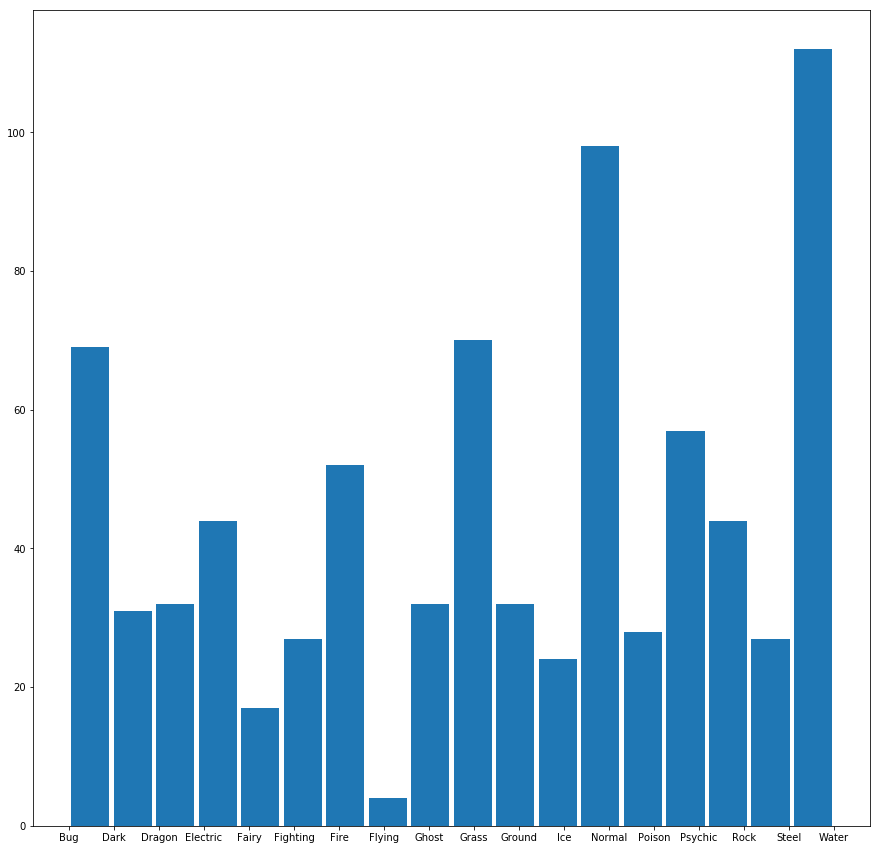

In [35]:
# Histograma que permite a visualização geral da distribuição dos pokémons de acordo com o seu tipo principal (Type 1)
plt.hist(data['Type 1'], rwidth= .9, bins= 18);
plt.rcParams['figure.figsize'] = (15,15)

# APLICANDO O ALGORITMO DO KMEANS#

Lendo os dados com o tamanho já acertado para ser compatível com a base de imagens

In [8]:
data_final = pd.read_excel('Pokexcel.xlsx') #lendo os dados já alterados e com o mesmo número de fotos
data_final.head(3)

Extraindo a cor predominante de cada imagem e armazenando-a em listas nos formatos RGB e HSV

Pegando as cores predominantes em cada imagem e mudando os nomes das categoras para números.

In [9]:
lis_cores_rgb_f = [] #lista que guardará os códigos RGB das cores predominantes em cada foto

lis_cores_hsv_f = [] #lista que guardará os códigos HSV das cores predominantes em cada foto

path = 'C:/Users/Enrico Aloisi Nardi/Desktop/Insper/SEGUNDO semestre/Ciência dos Dados/Projeto 3/Projeto-3--CDD/pokeimagens/'
arq_na_pasta= os.listdir(path)

for foto in arq_na_pasta:
    color_thief = ColorThief(path + foto)

    #recebendo a cor predominante de cada foto
    cor_predominante_f = color_thief.get_color(quality=1)
    lis_cores_rgb_f.append(cor_predominante_f)
    
    # Colocando a variável "cor predominante" numa função que converte um código de cores RGB em HSV e vice-versa.
    # Ela será utilzada para aumentar a 'precisão' da leitura da cor da foto feita pelo ColouThief, que entrega o resultado em RGB.
    # Com a conversão RGB-HSV buscamos reduzir confusões feitas pelo programa por conta de pequenas diferenças na cor lida.
    cor_predominante_hsv_f = colorsys.rgb_to_hsv(cor_predominante_f[0], cor_predominante_f[1], cor_predominante_f[2])
    
    lis_cores_hsv_f.append(cor_predominante_hsv_f[0] * 360)

In [97]:
data_final['H'] = [x for x in lis_cores_hsv_f]


# data_final.loc[data_final['Type 1'] == 'Water'   , "Categoria_Num"] = "0"
# data_final.loc[data_final['Type 1'] == 'Normal'  , "Categoria_Num"] = "1"
# data_final.loc[data_final['Type 1'] == 'Grass'   , "Categoria_Num"] = "2"
# data_final.loc[data_final['Type 1'] == 'Bug'     , "Categoria_Num"] = "3"
# data_final.loc[data_final['Type 1'] == 'Psychic' , "Categoria_Num"] = "4"
# data_final.loc[data_final['Type 1'] == 'Fire'    , "Categoria_Num"] = "5"
# data_final.loc[data_final['Type 1'] == 'Electric', "Categoria_Num"] = "6"
# data_final.loc[data_final['Type 1'] == 'Rock'    , "Categoria_Num"] = "7"
# data_final.loc[data_final['Type 1'] == 'Ghost'   , "Categoria_Num"] = "8"
# data_final.loc[data_final['Type 1'] == 'Dragon'  , "Categoria_Num"] = "9"
# data_final.loc[data_final['Type 1'] == 'Ground'  , "Categoria_Num"] = "10"
# data_final.loc[data_final['Type 1'] == 'Dark'    , "Categoria_Num"] = "11"
# data_final.loc[data_final['Type 1'] == 'Poison'  , "Categoria_Num"] = "12"
# data_final.loc[data_final['Type 1'] == 'Steel'   , "Categoria_Num"] = "13"
# data_final.loc[data_final['Type 1'] == 'Fighting', "Categoria_Num"] = "14"
# data_final.loc[data_final['Type 1'] == 'Ice'     , "Categoria_Num"] = "15"
# data_final.loc[data_final['Type 1'] == 'Fairy'   , "Categoria_Num"] = "16"
# data_final.loc[data_final['Type 1'] == 'Flying'  , "Categoria_Num"] = "17"

data_final.loc[data_final['Type 1'] == 'Water'   , "Categoria_Num"] = "0"
data_final.loc[data_final['Type 1'] == 'Normal'  , "Categoria_Num"] = "1"
data_final.loc[data_final['Type 1'] == 'Grass'   , "Categoria_Num"] = "2"
data_final.loc[data_final['Type 1'] == 'Bug'     , "Categoria_Num"] = "2"
data_final.loc[data_final['Type 1'] == 'Psychic' , "Categoria_Num"] = "3"
data_final.loc[data_final['Type 1'] == 'Fire'    , "Categoria_Num"] = "4"
data_final.loc[data_final['Type 1'] == 'Electric', "Categoria_Num"] = "5"
data_final.loc[data_final['Type 1'] == 'Rock'    , "Categoria_Num"] = "6"
data_final.loc[data_final['Type 1'] == 'Ghost'   , "Categoria_Num"] = "7"
data_final.loc[data_final['Type 1'] == 'Dragon'  , "Categoria_Num"] = "8"
data_final.loc[data_final['Type 1'] == 'Ground'  , "Categoria_Num"] = "6"
data_final.loc[data_final['Type 1'] == 'Dark'    , "Categoria_Num"] = "7"
data_final.loc[data_final['Type 1'] == 'Poison'  , "Categoria_Num"] = "2"
data_final.loc[data_final['Type 1'] == 'Steel'   , "Categoria_Num"] = "9"
data_final.loc[data_final['Type 1'] == 'Fighting', "Categoria_Num"] = "1"
data_final.loc[data_final['Type 1'] == 'Ice'     , "Categoria_Num"] = "0"
data_final.loc[data_final['Type 1'] == 'Fairy'   , "Categoria_Num"] = "10"
data_final.loc[data_final['Type 1'] == 'Flying'  , "Categoria_Num"] = "8"



data_f = data_final.drop(['Type 1','Type 2','Legendary','Name','Generation','#'], axis= 1)
data_f.head(3)

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,H,Categoria_Num
0,318,45,49,49,65,65,45,152.000000,2
1,405,60,62,63,80,80,60,97.941176,2
2,525,80,82,83,100,100,80,349.230769,2


Histograma com o número de pokémons por cluster encontrado pelo algoritmo do KMeans

In [98]:
modelo_parcial= KMeans(n_clusters= 10, init= 'k-means++', n_init= 15) #o número de clusters foi definido a partir do número de dados categorias diferentes de Pokémons
                                                                   #(15 no caso da primeira geração) 
modelo_parcial.fit(data_f)
y_pred = modelo_parcial.predict(data_f) #lista que guarda qual é o cluster ao qual pertence cada um dos pokémons
# plt.hist(y_pred, rwidth=.9, bins= 18);

data_f["Cluster_KM"]= y_pred #adicionando ao dataframe o cluster atribuído a cada pokémon via KMeans
data_f.head(3)

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,H,Categoria_Num,Cluster_KM
0,318,45,49,49,65,65,45,152.000000,2,5
1,405,60,62,63,80,80,60,97.941176,2,1
2,525,80,82,83,100,100,80,349.230769,2,4


In [89]:
data_f.corr(method='pearson')

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,H,Cluster,Cluster_KM
Total,1.000000,0.617931,0.736507,0.614463,0.747936,0.716707,0.573981,0.020565,0.067887,0.074935
HP,0.617931,1.000000,0.420774,0.239522,0.361849,0.378842,0.173738,-0.025936,0.070220,-0.024532
Attack,0.736507,0.420774,1.000000,0.439595,0.396526,0.262304,0.383306,0.024716,0.031620,0.225710
Defense,0.614463,0.239522,0.439595,1.000000,0.229778,0.512272,0.015133,0.046739,-0.077513,0.023997
Sp. Atk,0.747936,0.361849,0.396526,0.229778,1.000000,0.507014,0.467620,0.001992,0.119848,0.026008
Sp. Def,0.716707,0.378842,0.262304,0.512272,0.507014,1.000000,0.254668,-0.010665,-0.004324,-0.029705
Speed,0.573981,0.173738,0.383306,0.015133,0.467620,0.254668,1.000000,0.038018,0.135043,0.051909
H,0.020565,-0.025936,0.024716,0.046739,0.001992,-0.010665,0.038018,1.000000,0.224685,-0.037217
Cluster,0.067887,0.070220,0.031620,-0.077513,0.119848,-0.004324,0.135043,0.224685,1.000000,0.061917
Cluster_KM,0.074935,-0.024532,0.225710,0.023997,0.026008,-0.029705,0.051909,-0.037217,0.061917,1.000000


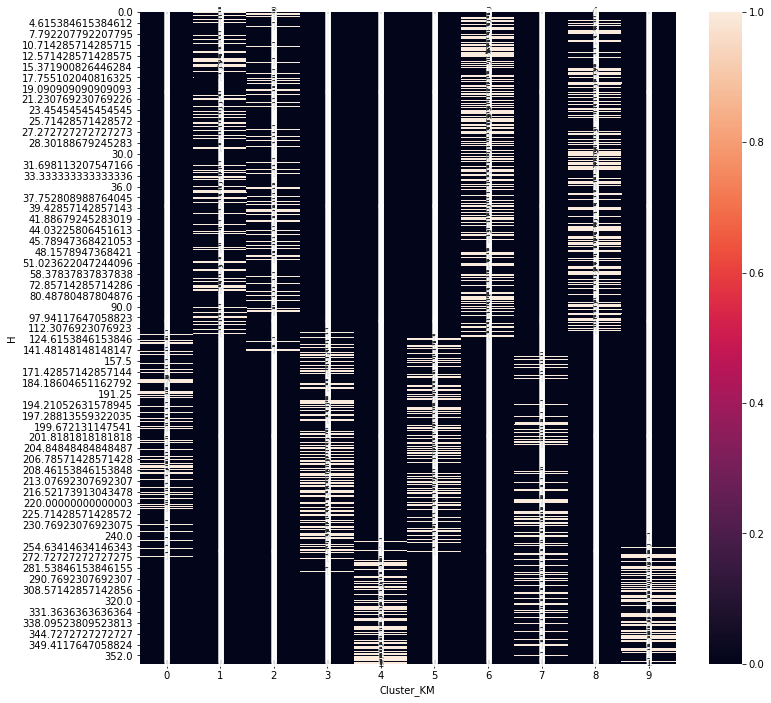

In [105]:
# pd.scatter_matrix(data_f, alpha = 1, figsize=(20,20));
plt.figure(figsize=(12,12))
sns.heatmap(pd.crosstab(data_f["H"],data_f["Cluster_KM"]), annot=True, robust= True);

In [103]:
#separando os pokémons a partir do cluster no qual eles foram colocados
c0  = data_f.loc[data_f["Cluster_KM"]  ==  0 ]
c1  = data_f.loc[data_f["Cluster_KM"]  ==  1 ]
c2  = data_f.loc[data_f["Cluster_KM"]  ==  2 ]
c3  = data_f.loc[data_f["Cluster_KM"]  ==  3 ]
c4  = data_f.loc[data_f["Cluster_KM"]  ==  4 ]
c5  = data_f.loc[data_f["Cluster_KM"]  ==  5 ]
c6  = data_f.loc[data_f["Cluster_KM"]  ==  6 ]
c7  = data_f.loc[data_f["Cluster_KM"]  ==  7 ]
c8  = data_f.loc[data_f["Cluster_KM"]  ==  8 ]
c9  = data_f.loc[data_f["Cluster_KM"]  ==  9 ]
# c10 = data_f.loc[data_f["Cluster"] == 10 ]
# c11 = data_f.loc[data_f["Cluster"] == 11 ]
# c12 = data_f.loc[data_f["Cluster"] == 12 ]
# c13 = data_f.loc[data_f["Cluster"] == 13 ]
# c14 = data_f.loc[data_f["Cluster"] == 14 ]
# c15 = data_f.loc[data_f["Cluster"] == 15 ]
# c16 = data_f.loc[data_f["Cluster"] == 16 ]
# c17 = data_f.loc[data_f["Cluster"] == 17 ]
c9

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,H,Categoria_Num,Cluster_KM
4,309,39,52,43,60,50,65,350.769231,4,9
16,195,40,35,30,20,20,50,333.333333,2,9
40,323,70,45,48,60,65,35,272.571429,10,9
51,285,35,70,55,45,55,25,307.500000,2,9
63,350,55,70,45,70,50,60,286.666667,4,9
65,300,40,50,40,40,40,90,337.894737,0,9
90,352,52,65,55,58,62,60,340.000000,1,9
106,325,30,105,90,25,25,50,350.833333,0,9
110,325,60,40,80,60,45,40,309.090909,2,9
116,385,90,55,75,60,75,30,314.482759,1,9


**Tentando** usar o spectral clustering

In [76]:
spectral = SpectralClustering(n_clusters=18, assign_labels="discretize", random_state=0).fit(data_f)
spectral.labels_
spectral 

 
modelo_parcial.fit(data_f)
y_pred = modelo_parcial.predict(data_f) #lista que guarda qual é o cluster ao qual pertence cada um dos pokémons
# plt.hist(y_pred, rwidth=.9, bins= 18);

data_f["Cluster_SC"]= y_pred #adicionando ao dataframe o cluster atribuído a cada pokémon via Spectral Clustering
data_f.head(3)

C:\Users\Enrico Aloisi Nardi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\Enrico Aloisi Nardi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\spectral.py:99: RuntimeWarning: divide by zero encountered in true_divide
  vectors = vectors / np.sqrt((vectors ** 2).sum(axis=1))[:, np.newaxis]


SpectralClustering(affinity='rbf', assign_labels='discretize', coef0=1,
          degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
          kernel_params=None, n_clusters=2, n_init=10, n_jobs=None,
          n_neighbors=10, random_state=0)

## Análise exploratória dos dados de cada cluster

Começamos a nossa análise exploratória com um hsitograma e uma contagem de pokémons por categoria a fim de entender como eles estão distribuídos dentre as 18 categorias possíveis.

In [34]:
R = [] 
G = []
B = []

for cor in lis_cores_rgb:
    R.append(cor[0])
    G.append(cor[1])
    B.append(cor[2])

fig = plt.figure()
ax = Axes3D(fig)

valores_x = R
valores_y = G
valores_z = B

ax.scatter(valores_x,valores_y,valores_z)
plt.xlabel('R')
plt.ylabel('G')
plt.show()
#O EIXO Z É O AZUL

NameError: name 'lis_cores_rgb' is not defined

## Aplicando o algoritmo do KMeans

In [ ]:
modelo_completo= KMeans(n_clusters= 18) #o número de clusters foi definido a partir do número de dados categorias diferentes de Pokémons
                                        #(18 no caso de todas as gerações até a sexta) 
modelo_completo.fit(data2)
y_pred = modelo_completo.predict(data2) #lista que guarda qual é o cluster ao qual pertence cada um dos pokémons
plt.hist(y_pred, bins= 18);


# Relatório do projeto

### Procedimentos realizados com as bases de dados (imagens + stats)

##### Imagens
Inicialmente, as imagens dos Pokémons são vetorizadas para que a função ColourThief possa extrair a cor predominante de cada uma delas. Neste ponto é importante notar que como a extensão das imagens dos Pokémons é .png, elas não têm fundo, ou seja, a cor extraída pela função não é afetada por um eventual fundo branco.

##### Stats
Embora tenham sido feitos vários testes com e sem algumas colunas dos dados originais -como inclusive será investigado em seções futuras do relatório-, algumas colunas não foram utilizadas em nenhum momento da análise, tais como Nomes, tipo secundário e se o Pokémon é lendário ou não.

### Método de análise utilizado
#### Explicando o K-means

### Verificando a qualidade da classificação em diferentes cenários

#### Código de cores: RGB vs. HSV
#### Com stats e sem stats
#### Com geração e sem geração
#### Com número de referência do Pokémon e sem número de referência do Pokémon

##### Fontes:
CSV com dados sobre os Pokémons: https://www.kaggle.com/abcsds/pokemon

Database de fotos: https://www.kaggle.com/kvpratama/pokemon-images-dataset